<a href="https://colab.research.google.com/github/Thustra-maker/Metodos1_JosephSimahan_JuanSanchez/blob/main/Tarea1_M%C3%A9todos_Computacionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

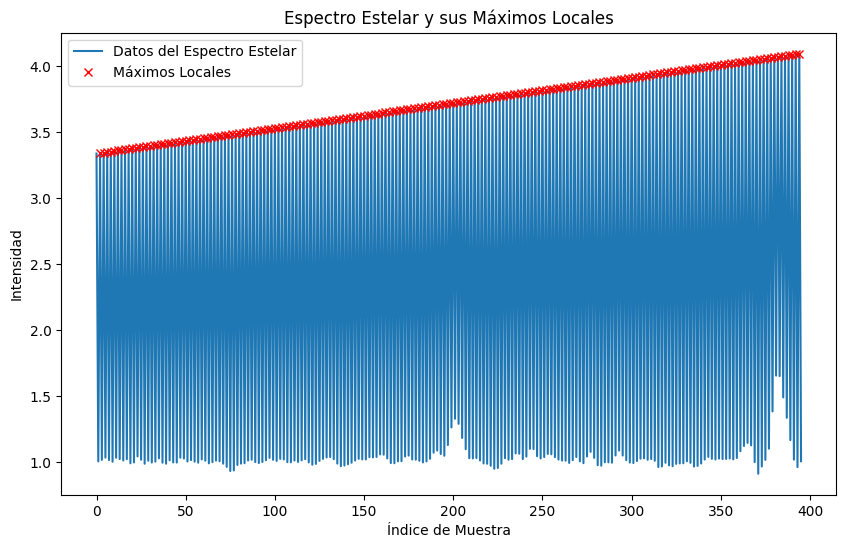

In [ ]:
#2.02 Máximos

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# URL del archivo de datos de espectro estelar
url_datos_espectro = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EstrellaEspectro.txt"

# Cargar los datos desde la URL y asegurarse de que sean un array unidimensional
espectro_datos = np.loadtxt(url_datos_espectro)

# Verificar si los datos son unidimensionales
if espectro_datos.ndim > 1:
    espectro_datos = espectro_datos.flatten()

# Encontrar los máximos locales en los datos del espectro
indices_maximos_locales, _ = find_peaks(espectro_datos)

# Graficar la serie de datos del espectro junto con los máximos locales
plt.figure(figsize=(10, 6))
plt.plot(espectro_datos, label="Datos del Espectro Estelar")
plt.plot(indices_maximos_locales, espectro_datos[indices_maximos_locales], "rx", label="Máximos Locales")
plt.title("Espectro Estelar y sus Máximos Locales")
plt.xlabel("Índice de Muestra")
plt.ylabel("Intensidad")
plt.legend()
plt.show()



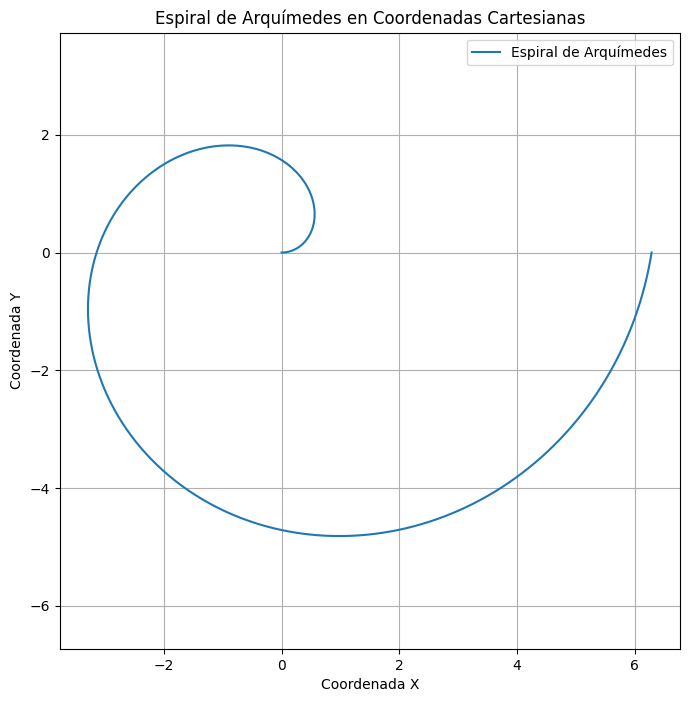

In [ ]:
#2.05 Espiral de Arquimides
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la espiral de Arquímedes
parametro_a = 0
parametro_b = 1

# Rango de valores de theta (ángulo en radianes)
theta = np.linspace(0, 2 * np.pi, 1000)

# Cálculo de la distancia radial r para cada valor de theta
distancia_radial = parametro_a + parametro_b * theta

# Conversión de coordenadas polares a cartesianas
coordenada_x = distancia_radial * np.cos(theta)
coordenada_y = distancia_radial * np.sin(theta)

# Graficar la espiral de Arquímedes
plt.figure(figsize=(8, 8))
plt.plot(coordenada_x, coordenada_y, label='Espiral de Arquímedes')
plt.title('Espiral de Arquímedes en Coordenadas Cartesianas')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid(True)
plt.legend()
plt.axis('equal')  # Para asegurar que la escala sea igual en ambos ejes
plt.show()


In [ ]:
from sympy import symbols, Function, diff, simplify, series

# Definir las variables
x, h = symbols('x h')
f = Function('f')(x)

# Expansión de Taylor de f(x_{i+2}) alrededor de x_i
taylor_forward_2h = series(f.subs(x, x + 2*h), x, x0=x, n=5).removeO()
# Expansión de Taylor de f(x_{i-2}) alrededor de x_i
taylor_backward_2h = series(f.subs(x, x - 2*h), x, x0=x, n=5).removeO()

# Sumar las expansiones para obtener la segunda derivada aproximada
sum_expansions = taylor_forward_2h + taylor_backward_2h - 2*f

# Simplificar la expresión para obtener la segunda derivada
second_derivative_approx = simplify(sum_expansions / (4 * h**2))

second_derivative_approx



(f(-2*h) + f(2*h) - 2*f(x))/(4*h**2)

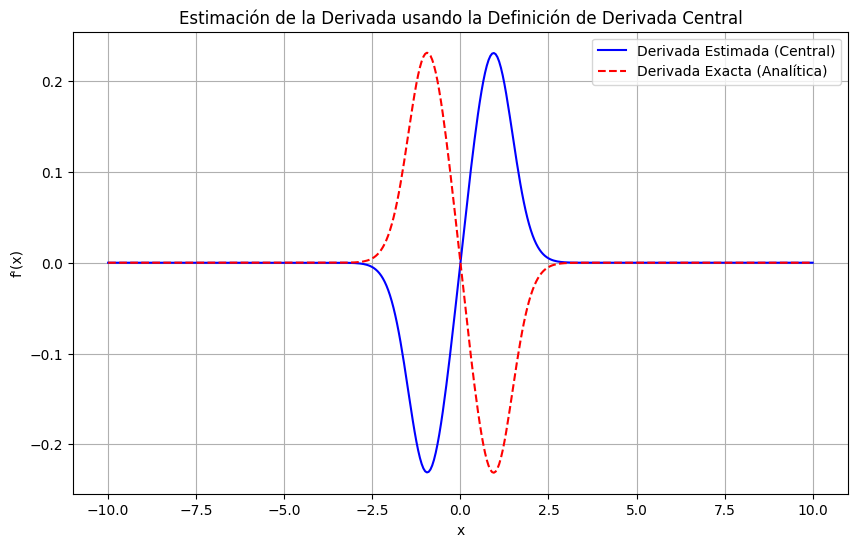

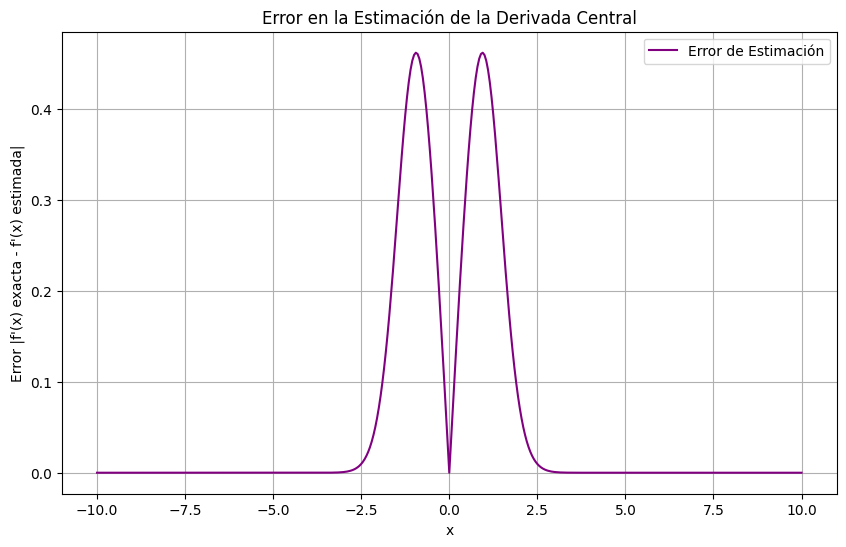

In [ ]:
#Ejercicio de Derivación 2
import numpy as np
import matplotlib.pyplot as plt

# Definir la función f(x)
def funcion_fx(x):
    return 1 / np.sqrt(1 + np.exp(-x**2))

# Definir la derivada analítica de f(x) para comparación
def derivada_analitica_fx(x):
    numerador = x * np.exp(-x**2)
    denominador = (1 + np.exp(-x**2))**(3/2)
    return -numerador / denominador

# Definir la derivada central
def derivada_central(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

# Parámetros
h = 0.05
x_values = np.arange(-10, 10 + h, h)  # Incluyendo el punto 10

# Calcular la derivada usando la definición de derivada central
derivada_estimacion = derivada_central(funcion_fx, x_values, h)

# Calcular la derivada analítica
derivada_exacta = derivada_analitica_fx(x_values)

# Estimar el error en cada punto nodal
error_estimacion = np.abs(derivada_exacta - derivada_estimacion)

# Graficar la derivada estimada y la exacta
plt.figure(figsize=(10, 6))
plt.plot(x_values, derivada_estimacion, label='Derivada Estimada (Central)', color='blue')
plt.plot(x_values, derivada_exacta, label='Derivada Exacta (Analítica)', linestyle='dashed', color='red')
plt.title("Estimación de la Derivada usando la Definición de Derivada Central")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)
plt.show()

# Graficar el error
plt.figure(figsize=(10, 6))
plt.plot(x_values, error_estimacion, label='Error de Estimación', color='purple')
plt.title("Error en la Estimación de la Derivada Central")
plt.xlabel("x")
plt.ylabel("Error |f'(x) exacta - f'(x) estimada|")
plt.legend()
plt.grid(True)
plt.show()



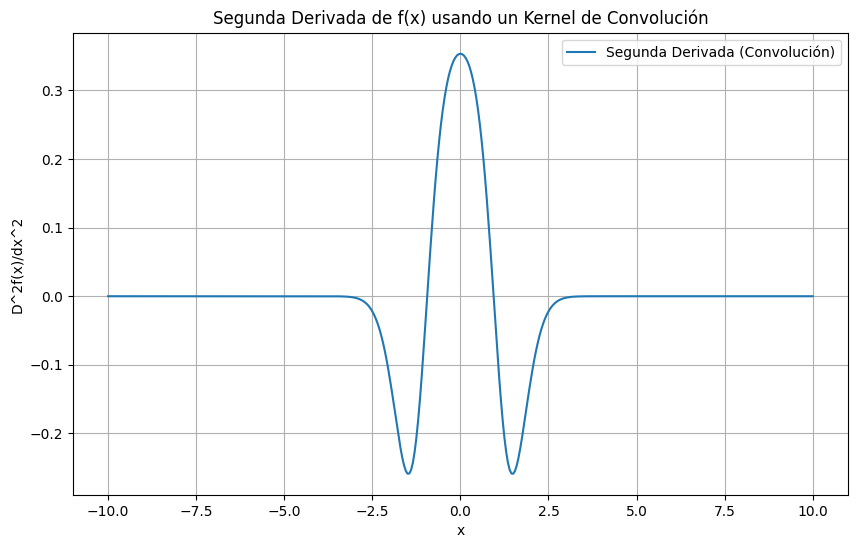

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve1d

# Definir la función f(x)
def funcion_fx(x):
    return 1 / np.sqrt(1 + np.exp(-x**2))

# Parámetros
h = 0.05
x_values = np.arange(-10, 10 + h, h)

# Calcular la función f(x) en los valores x_values
f_values = funcion_fx(x_values)

# Definir el kernel para la segunda derivada central
kernel_segunda_derivada = np.array([1, -2, 1]) / h**2

# Aplicar la convolución para obtener la segunda derivada
segunda_derivada = convolve1d(f_values, kernel_segunda_derivada, mode='reflect')

# Graficar la segunda derivada
plt.figure(figsize=(10, 6))
plt.plot(x_values, segunda_derivada, label='Segunda Derivada (Convolución)')
plt.title("Segunda Derivada de f(x) usando un Kernel de Convolución")
plt.xlabel("x")
plt.ylabel("D^2f(x)/dx^2")
plt.grid(True)
plt.legend()
plt.show()


<ipython-input-11-5d8b206ed0c9>:18: RuntimeWarning: divide by zero encountered in divide
  return V * X * (1 - (R**2 / (X**2 + Y**2)))
<ipython-input-11-5d8b206ed0c9>:18: RuntimeWarning: invalid value encountered in multiply
  return V * X * (1 - (R**2 / (X**2 + Y**2)))


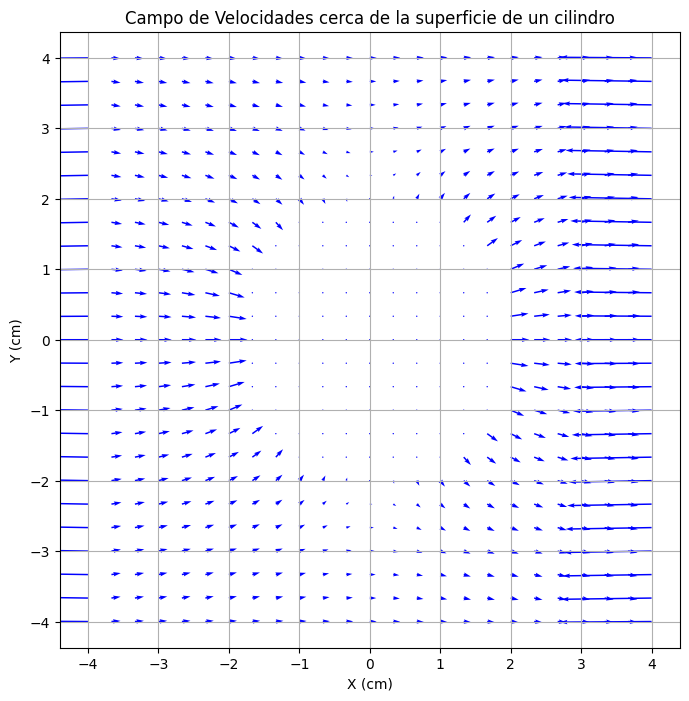

In [ ]:
#Ejercicio de Derivación 6

import numpy as np
import matplotlib.pyplot as plt

# Parámetros
R = 2  # Radio del cilindro en cm
V = 2  # Velocidad en cm/s
h = 0.001  # Paso para la derivada central

# Definir la discretización
x = np.linspace(-4, 4, 25)
y = np.linspace(-4, 4, 25)
X, Y = np.meshgrid(x, y)

# Definir la función potencial del flujo
def potencial_flujo(X, Y, V, R):
    return V * X * (1 - (R**2 / (X**2 + Y**2)))

# Calcular la función potencial
phi = potencial_flujo(X, Y, V, R)

# Definir la derivada central para calcular vx y vy
def derivada_central(f, h, axis):
    return (np.roll(f, -1, axis=axis) - np.roll(f, 1, axis=axis)) / (2 * h)

# Calcular vx y vy
vx = derivada_central(phi, h, axis=1)
vy = derivada_central(phi, h, axis=0)

# Establecer el campo de velocidades en el interior del cilindro a cero
mascara_cilindro = X**2 + Y**2 < R**2
vx[mascara_cilindro] = 0
vy[mascara_cilindro] = 0

# Dibujar el campo de velocidades usando un gráfico de vectores (quiver)
plt.figure(figsize=(8, 8))
plt.quiver(X, Y, vx, vy, color='b')
plt.title("Campo de Velocidades cerca de la superficie de un cilindro")
plt.xlabel("X (cm)")
plt.ylabel("Y (cm)")
plt.grid(True)
plt.axis('equal')
plt.show()
